# data_merge loading 

In [34]:
# import necessary libraries and load data_merge 
import pandas as pd
data_merge_yt1 = pd.read_csv('D:\skyline project\Projects\week1\dataset\youtube_video_comments\Youtube01-Psy.csv')
data_merge_yt2 = pd.read_csv('D:\skyline project\Projects\week1\dataset\youtube_video_comments\Youtube02-KatyPerry.csv')
data_merge_yt3 = pd.read_csv('D:\skyline project\Projects\week1\dataset\youtube_video_comments\Youtube03-LMFAO.csv')
data_merge_yt4 = pd.read_csv('D:\skyline project\Projects\week1\dataset\youtube_video_comments\Youtube04-Eminem.csv')
data_merge_yt5 = pd.read_csv('D:\skyline project\Projects\week1\dataset\youtube_video_comments\Youtube05-Shakira.csv')
# show the shapes of all data_merge frames 
print(data_merge_yt1.shape, data_merge_yt2.shape, data_merge_yt3.shape, data_merge_yt4.shape, data_merge_yt5.shape)


(350, 5) (350, 5) (438, 5) (448, 5) (370, 5)


In [35]:
# merge all the data_merge into one data_mergeframe 
data_merge = pd.concat([data_merge_yt1, data_merge_yt2, data_merge_yt3, data_merge_yt4, data_merge_yt5])
# shuffle the data_merge
data_merge = data_merge.sample(frac=1).reset_index(drop=True)
# show then shape of the data_merge 
print(data_merge.shape)
# show the data_merge columns in single row full width
pd.set_option('display.max_colwidth', None)
# show the data_merge head again
data_merge.head() 

(1956, 5)


,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,z12uvzpw4tufgf2qw04chd5abu3uvf4rw5o,Eric Gonzalez,2015-05-24T15:35:03.844000,"To help shakira become the first female to hit 1billiom views, I&#39;ve decided to watch this Video at least one a day. Everyday! Shakifans we r so close just hit the replay button !!!﻿",0
1,z13owrjplrmwwf21b22qzbbjlx3etfoha04,Chutipha Wongsaroj,NaN,Check out this video on YouTube:﻿,1
2,z13gdxtwjrjoczd5h04cejcqqpedxxoyn34,Aleesha Hoover,2015-05-22T14:44:13.619000,Love the video ﻿,0
3,z13zvnepkwvgirzi104cdf1pyyyecthieew,Ali Altınışık,2015-05-18T10:56:12.254000,Wow dance show﻿,0
4,z12svjz4pt3sxvser22cgdsbnyfwtn55l04,Emma Fedorova,2015-05-26T22:16:39.932000,LOVE IT!!!!!!!﻿,0


data_merge evaluation and understanding

In [36]:
# print the no of 0 and 1 counts of each data_merge frame using formatted string
print(f"data_merge_yt1: {data_merge_yt1['CLASS'].value_counts()}")
print(f"data_merge_yt2: {data_merge_yt2['CLASS'].value_counts()}")
print(f"data_merge_yt3: {data_merge_yt3['CLASS'].value_counts()}")
print(f"data_merge_yt4: {data_merge_yt4['CLASS'].value_counts()}")
print(f"data_merge_yt5: {data_merge_yt5['CLASS'].value_counts()}")
print(f"Merged data_merge: {data_merge['CLASS'].value_counts()}") 

data_merge_yt1: 1    175
0    175
Name: CLASS, dtype: int64
data_merge_yt2: 1    175
0    175
Name: CLASS, dtype: int64
data_merge_yt3: 1    236
0    202
Name: CLASS, dtype: int64
data_merge_yt4: 1    245
0    203
Name: CLASS, dtype: int64
data_merge_yt5: 0    196
1    174
Name: CLASS, dtype: int64
Merged data_merge: 1    1005
0     951
Name: CLASS, dtype: int64


In [37]:
print(data_merge.info())
print(data_merge.describe())
print(data_merge.isnull().sum())
# remove the null values
data_merge.dropna(inplace=True)
print(data_merge.isnull().sum())
# check the shape of the data_merge
print(data_merge.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1956 entries, 0 to 1955
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   COMMENT_ID  1956 non-null   object
 1   AUTHOR      1956 non-null   object
 2   DATE        1711 non-null   object
 3   CONTENT     1956 non-null   object
 4   CLASS       1956 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 76.5+ KB
None
             CLASS
count  1956.000000
mean      0.513804
std       0.499937
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000
COMMENT_ID      0
AUTHOR          0
DATE          245
CONTENT         0
CLASS           0
dtype: int64
COMMENT_ID    0
AUTHOR        0
DATE          0
CONTENT       0
CLASS         0
dtype: int64
(1711, 5)


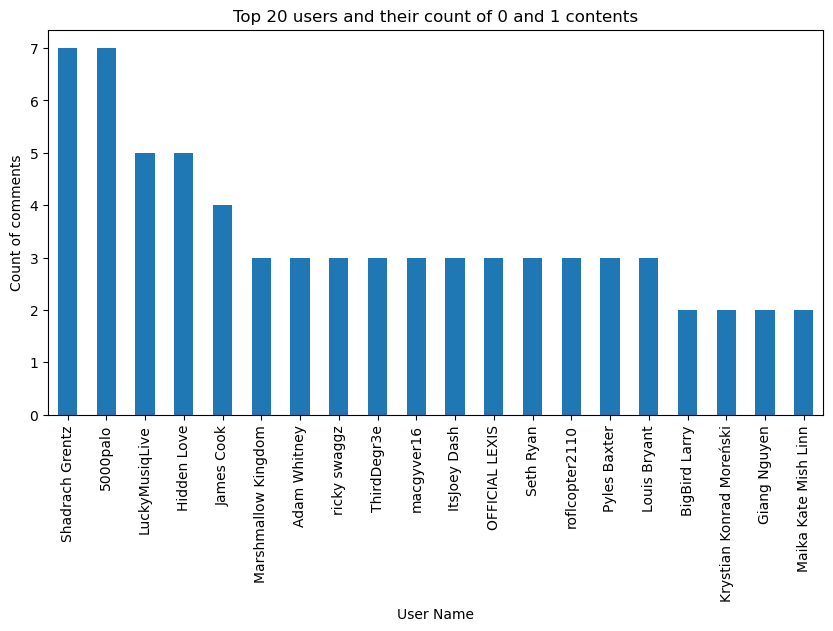

In [7]:
import matplotlib.pyplot as plt
# plot the top 20 users and their count of 0 and 1 contents using bar chart
top_20_users = data_merge['AUTHOR'].value_counts().head(20)
top_20_users.plot(kind='bar', figsize=(10, 5))
plt.title('Top 20 users and their count contents')
plt.xlabel('User Name')
plt.ylabel('Count of comments')
plt.show()


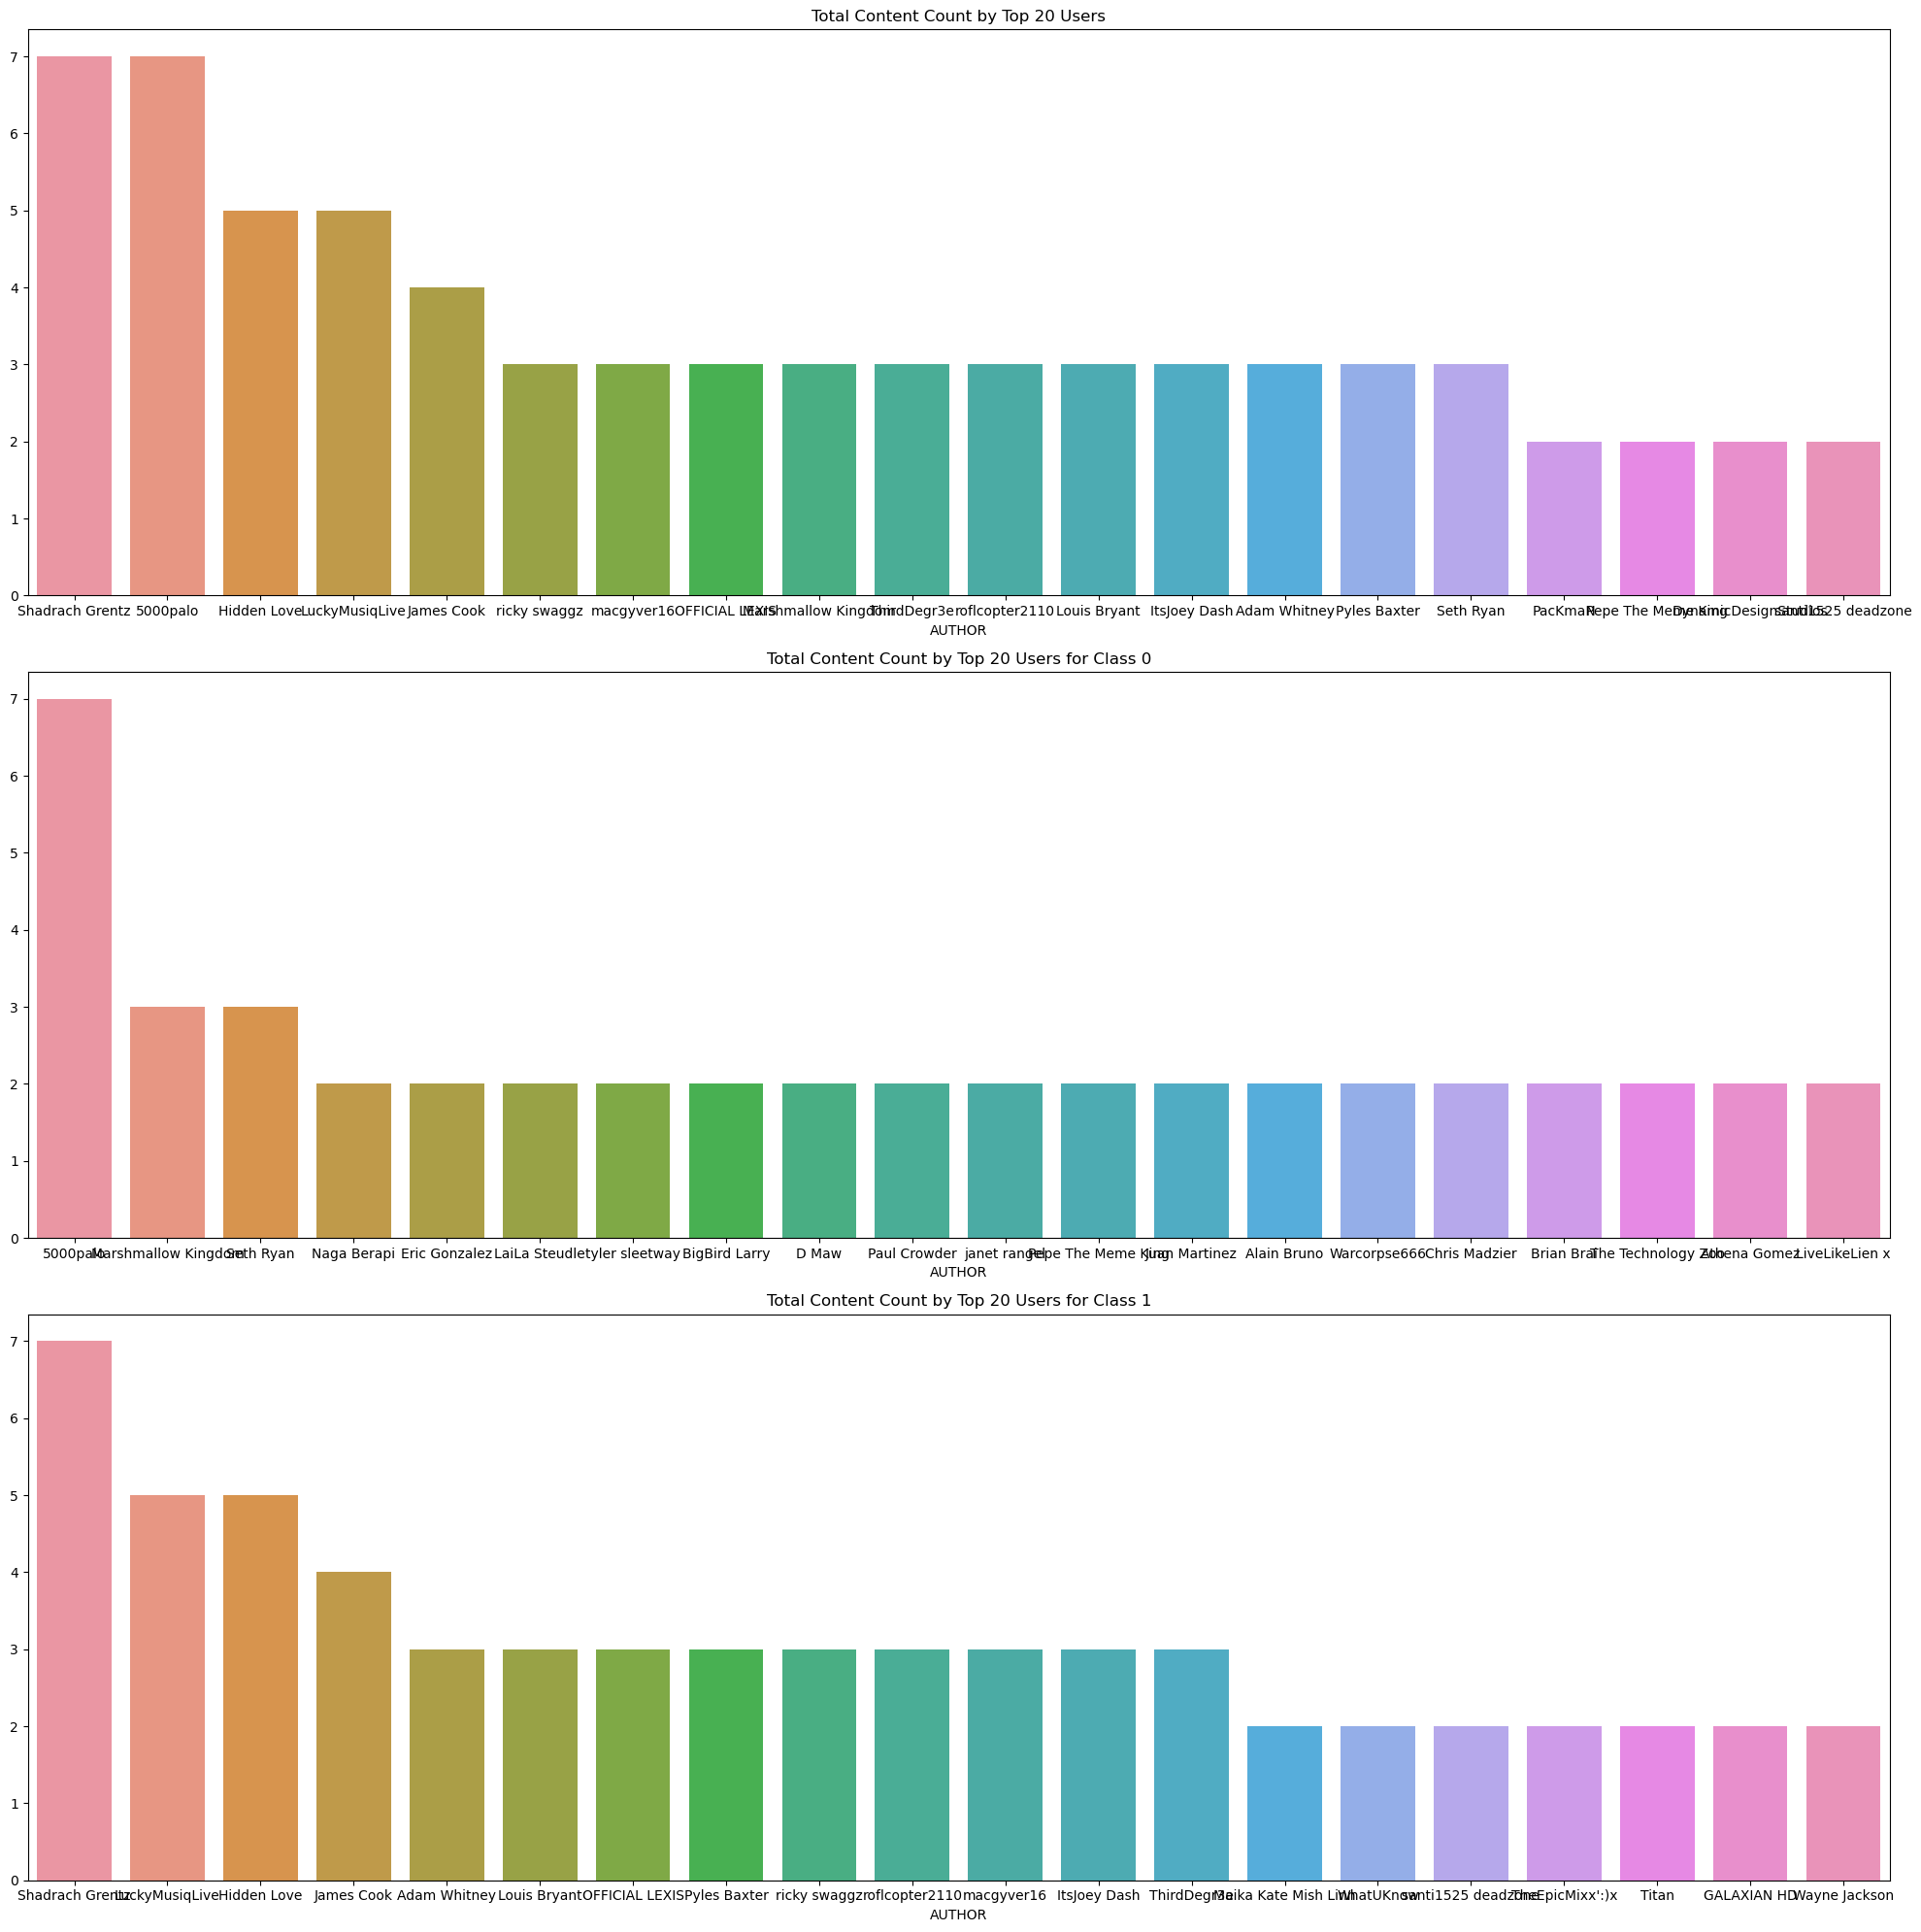

In [9]:
import seaborn as sns
# print the total number of contents by top 20 users and its 0 and 1 class counts seperately as bar plot 

total_content_by_top_20_users = data_merge.groupby('AUTHOR')['CONTENT'].count().sort_values(ascending=False)[:20]
total_content_by_top_20_users_0 = data_merge[data_merge['CLASS'] == 0].groupby('AUTHOR')['CONTENT'].count().sort_values(ascending=False)[:20]
total_content_by_top_20_users_1 = data_merge[data_merge['CLASS'] == 1].groupby('AUTHOR')['CONTENT'].count().sort_values(ascending=False)[:20]
# plot the bar plot for each user its total content count and its 0 and 1 class count consecutively 
fig, ax = plt.subplots(3, 1, figsize=(20, 20))
sns.barplot(x=total_content_by_top_20_users.index, y=total_content_by_top_20_users.values, ax=ax[0])
ax[0].set_title('Total Content Count by Top 20 Users')
sns.barplot(x=total_content_by_top_20_users_0.index, y=total_content_by_top_20_users_0.values, ax=ax[1])
ax[1].set_title('Total Content Count by Top 20 Users for Class 0')
sns.barplot(x=total_content_by_top_20_users_1.index, y=total_content_by_top_20_users_1.values, ax=ax[2])
ax[2].set_title('Total Content Count by Top 20 Users for Class 1')
plt.tight_layout()
plt.show()


data_merge preprocessing

In [10]:
# import necessary libraries for text data_merge preprocessing
import pandas as pd
import numpy as np
import re
import string
import nltk
from nltk.corpus import stopwords
# import word tokenizer
from nltk.tokenize import word_tokenize
# import beutiful soup for html parsing
from bs4 import BeautifulSoup
from nltk.stem.porter import PorterStemmer  
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

preprocess the data_merge using the following steps: 
1. remove the punctuations
2. remove the stopwords
3. remove the numbers
4. remove the emojis
5. remove the urls
6. remove the html tags
7. remove the extra spaces
8. convert the text to lowercase
9. lemmatize the text
10. remove the words with length less than 2
11. remove the words with length greater than 15

In [11]:
# 1 remove the punctuations using the following function: 
def remove_punctuations(text):
    """ remove punctuations """
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text
# 2 remove the stopwords using the following function:
def remove_stopwords(text):
    """ remove stopwords """
    text_tokens = word_tokenize(text)
    tokens_without_sw = [word for word in text_tokens if not word in stopwords.words()]
    return ' '.join(tokens_without_sw)
# 3 remove the numbers using the following function:
def remove_numbers(text):
    """ remove numbers """
    text = re.sub(r'\d+', '', text)
    return text
# 4 remove the emojis using the following function:
def remove_emojis(text):
    """ remove emojis """
    text= demoji.replace(text, '')
    return text
# 5 remove the urls using the following function:
def remove_urls(text):
    """ remove urls """
    text = re.sub(r'http\S+', '', text)
    return text
# 6 remove the html tags using the following function:
def remove_html_tags(text):
    """ remove html tags """
    text = BeautifulSoup(text, 'lxml').get_text()
    return text
# 7 remove the extra spaces using the following function:
def remove_extra_spaces(text):
    """ remove extra spaces """
    text = re.sub(' +', ' ', text)
    return text
# 8 convert the text to lowercase using the following function:
def convert_to_lowercase(text):
    """ convert to lowercase """
    text = text.lower()
    return text
# 9 lemmatize the text using the following function:
def lemmatize_text(text):
    """ lemmatize text """
    lemmatizer = WordNetLemmatizer()
    text_tokens = word_tokenize(text)
    text = ' '.join([lemmatizer.lemmatize(word) for word in text_tokens])
    return text
# 10 remove the words with length less than 2 and greater than 15 using the following function:
def remove_words_with_length_less_than_2_and_greater_than_15(text):
    """ remove words with length less than 2 and greater than 15 """
    text_tokens = word_tokenize(text)
    tokens_without_sw = [word for word in text_tokens if len(word) > 2 and len(word) < 15]
    return ' '.join(tokens_without_sw)

In [12]:
# install emoji library if not installed 
# !pip install demoji
import demoji


In [38]:
# preprocess the data_merge using the following function:
def preprocess_data_merge(data_merge):
    """ preprocess data_merge """
    data_merge['CONTENT'] = data_merge['CONTENT'].apply(remove_punctuations)
    data_merge['CONTENT'] = data_merge['CONTENT'].apply(remove_stopwords)
    # data_merge['CONTENT'] = data_merge['CONTENT'].apply(remove_numbers)
    data_merge['CONTENT'] = data_merge['CONTENT'].apply(remove_emojis)
    data_merge['CONTENT'] = data_merge['CONTENT'].apply(remove_urls)
    data_merge['CONTENT'] = data_merge['CONTENT'].apply(remove_html_tags)
    data_merge['CONTENT'] = data_merge['CONTENT'].apply(remove_extra_spaces)
    data_merge['CONTENT'] = data_merge['CONTENT'].apply(convert_to_lowercase)
    # data_merge['CONTENT'] = data_merge['CONTENT'].apply(lemmatize_text)
    # data_merge['CONTENT'] = data_merge['CONTENT'].apply(remove_words_with_length_less_than_2_and_greater_than_15)
    return data_merge


In [39]:
# call the data_merge preprocessing function to get the preprocessed data_merge 
cleaned_data_merge = preprocess_data_merge(data_merge)
cleaned_data_merge.head(10)

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,z12uvzpw4tufgf2qw04chd5abu3uvf4rw5o,Eric Gonzalez,2015-05-24T15:35:03.844000,to shakira female hit 1billiom views i39ve decided watch video day everyday shakifans r close hit replay button ﻿,0
2,z13gdxtwjrjoczd5h04cejcqqpedxxoyn34,Aleesha Hoover,2015-05-22T14:44:13.619000,love video ﻿,0
3,z13zvnepkwvgirzi104cdf1pyyyecthieew,Ali Altınışık,2015-05-18T10:56:12.254000,wow dance show﻿,0
4,z12svjz4pt3sxvser22cgdsbnyfwtn55l04,Emma Fedorova,2015-05-26T22:16:39.932000,love it﻿,0
5,z12wuz2qqnawe50js04cejpzosrzdr0r1k40k,Dana Matich,2014-11-08T03:32:55,hey guys check kollektivet dont slappin penis i deserve credit receive﻿,1
6,LZQPQhLyRh9vw01Xvvw5yWzZEUOPG1hSgRMHep55-Yw,8-BitMusic,2013-12-27T23:07:50,hey guys im 12 yr music producer i make chiptunes 8bit music it wonderful checked 8bit remixes i gangnamstyle 8bit remix check thanks,1
7,z133dbir3vbttld3122mdjtjyq3dc35z504,Ticci TøbyyX3,2015-05-20T10:15:33.415000,i lovee ﻿,0
8,z13derchioqxifr1m22pztjgvwuewvtz404,Jane Kaspar,2014-09-27T11:50:38,how katy perry﻿,0
9,z13puxp4xp35shhfy22bxx5pqlecxhqgc04,Ashleigh_ Baise,2015-05-28T22:21:26.037000,the boyfriend charlie tv show lost ﻿,0
10,z13ltz3bakrjfxxhx04ccvzhorbicrlrnt00k,Aquan Hall,2015-05-12T17:25:33.187000,youtube collaborator39s subscribe i39ll subscribe back i start uploading youtube videos relnofollow classothashtag href,1


In [16]:
# split the data_merge into train and test sets we will use cleaned_data_merge[content] and cleaned_data_merge[CLASS] as features and labels respectively.
# drop the other columns from cleaned_data_merge data_mergeframe.

final_data_merge = cleaned_data_merge[['CONTENT', 'CLASS']]
final_data_merge.head()

,CONTENT,CLASS
0,cover check thank umichael age,1
1,the girl train dancing outfit fucking sexy huge turnoff lacked eyebrows,0
2,the comment chuck norrus ovbiously,0
3,you music hero﻿,0
4,katy perry roar official love song video katy perry rocks wahoo,0


In [17]:
# now text is cleaned and ready for analysis and modeling 
# next step is to vectorize the text and then model it
# vectorize the text using both tfidf and count vectorizer and save the vectorized data_merge separately

tfidf_vectorizer = TfidfVectorizer()
count_vectorizer = CountVectorizer()

# vectorize the text using tfidf vectorizer
tfidf_vectorized_data_merge = tfidf_vectorizer.fit_transform(final_data_merge['CONTENT'])
# vectorize the text using count vectorizer
count_vectorized_data_merge = count_vectorizer.fit_transform(final_data_merge['CONTENT'])

data_merge splitting for training and testing

In [22]:
# split data_merge into train and test using sklearn 
# from sklearn.model_selection import train_test_split
# once use tfidf vectorized data_merge and once use count vectorized data_merge for model training
# print then shape of tfidf vectorized data_merge and count vectorized data_merge
print("Shape of tfidf vectorized data_merge: ", tfidf_vectorized_data_merge.shape)
print("Shape of count vectorized data_merge: ", count_vectorized_data_merge.shape)


# use train test split to split the data_merge into train and test
# use tfidf vectorized data_merge for training
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(tfidf_vectorized_data_merge, final_data_merge['CLASS'], test_size=0.2, random_state=42 ,stratify=final_data_merge['CLASS'])
# use count vectorized data_merge for training
X_train_count, X_test_count, y_train_count, y_test_count = train_test_split(count_vectorized_data_merge, final_data_merge['CLASS'], test_size=0.2, random_state=42, stratify=final_data_merge['CLASS'])


Shape of tfidf vectorized data_merge:  (1711, 2949)
Shape of count vectorized data_merge:  (1711, 2949)


In [23]:
# check the class imbalance in the data_mergeset both train and test
print(f"Train data_mergeset class imbalance: {y_train_tfidf.value_counts()}")
print(f"Test data_mergeset class imbalance: {y_test_tfidf.value_counts()}")

Train data_mergeset class imbalance: 0    760
1    608
Name: CLASS, dtype: int64
Test data_mergeset class imbalance: 0    191
1    152
Name: CLASS, dtype: int64


model training

In [24]:
# first train the NB model using train data_merge 
# then test the model using test data_merge
# then predict the model using predict data_merge

model = MultinomialNB()
model.fit(X_train_tfidf, y_train_tfidf)
# predict the labels on validation data_mergeset
predictions = model.predict(X_test_tfidf)



In [25]:
print("Accuracy score: ", accuracy_score(y_test_tfidf, predictions))
print("F1 score: ", f1_score(y_test_tfidf, predictions))
print("Precision score: ", precision_score(y_test_tfidf, predictions))
print("Recall score: ", recall_score(y_test_tfidf, predictions))


Accuracy score:  0.8658892128279884
F1 score:  0.832116788321168
Precision score:  0.9344262295081968
Recall score:  0.75


In [26]:
# print the confusion matrix 
print(confusion_matrix(y_test_tfidf, predictions))

[[183   8]
 [ 38 114]]


In [27]:
# now use count vectorizer data_merge to train the model
model.fit(X_train_count, y_train_count)
# now predict the model
predicted = model.predict(X_test_count)


evaluation of the model

In [28]:
# use accuracy score, f score precision and recall to evaluate the model

print("Accuracy score: ", accuracy_score(y_test_count, predicted))
print("F1 score: ", f1_score(y_test_count, predicted))
print("Precision score: ", precision_score(y_test_count, predicted))
print("Recall score: ", recall_score(y_test_count, predicted))

Accuracy score:  0.8658892128279884
F1 score:  0.8391608391608391
Precision score:  0.8955223880597015
Recall score:  0.7894736842105263


In [29]:
# print the confusion matrix 
print(confusion_matrix(y_test_count, predicted))

[[177  14]
 [ 32 120]]
